### Add Memory in Agentic Graph

d:\AgenticAI\.venv\Scripts\python.exe
True


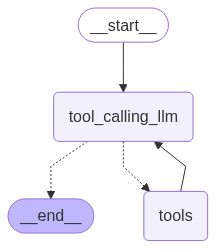

In [ ]:
from langchain_tavily import TavilySearch
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from IPython.display import Image, display



class State(TypedDict):
    messages:Annotated[list,add_messages] ## add_message is acting as reducer

graph_builder=StateGraph(State)
graph_builder

import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

import os
os.environ["GROQ_API_KEY"] = "GROQ_API_KEY"
llm = ChatGroq(model="llama3-8b-8192")
llm

llm = ChatGroq(model="llama3-8b-8192", api_key=os.environ["GROQ_API_KEY"])


tool  = TavilySearch(max_search=2)
tool.invoke("What is langgraph")

import sys
print(sys.executable)

import pkg_resources
installed_packages = {pkg.key for pkg in pkg_resources.working_set}
print('langchain-tavily' in installed_packages)


##Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    args:
         a(int): first int
         b(int): second int
        
    Returns:
        int:output int
    
    """

    return a*b




tools=[tool,multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

### Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node Defination
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## create a graph
builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## add edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest messgaes (result) from assistant is a tool call ->tools_condition routes to tools
    # if the latest messgaes (result) from assistant is a not tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")


##compile the graph
graph1 = builder.compile()
display(Image(graph1.get_graph().draw_mermaid_png()))



In [3]:
respone =graph1.invoke({"messages":"Hi my name is Atul"})
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

content='Hi my name is Atul' additional_kwargs={} response_metadata={} id='0dd5ac62-5093-4822-87aa-d4ef62936f00'
content='Nice to meet you, Atul! What brings you here today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 2204, 'total_tokens': 2219, 'completion_time': 0.025332923, 'prompt_time': 0.248870543, 'queue_time': 0.274490134, 'total_time': 0.274203466}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None} id='run--5accd866-1e6b-4d35-9aed-bf73d475f189-0' usage_metadata={'input_tokens': 2204, 'output_tokens': 15, 'total_tokens': 2219}


In [4]:
respone =graph1.invoke({"messages":"what is my name ?"})
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

content='what is my name ?' additional_kwargs={} response_metadata={} id='f4978e0c-5215-42e4-bd05-e7eaadbebc34'
content='' additional_kwargs={'tool_calls': [{'id': 'aqnb0sbqd', 'function': {'arguments': '{"query":"what is my name"}', 'name': 'tavily_search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 2203, 'total_tokens': 2391, 'completion_time': 0.29818505, 'prompt_time': 0.252534011, 'queue_time': 0.27517902600000005, 'total_time': 0.550719061}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--246329e2-c1e1-4c6b-b607-54465ede75ea-0' tool_calls=[{'name': 'tavily_search', 'args': {'query': 'what is my name'}, 'id': 'aqnb0sbqd', 'type': 'tool_call'}] usage_metadata={'input_tokens': 2203, 'output_tokens': 188, 'total_tokens': 2391}
content='{"query": "what is my name", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Wh

d:\AgenticAI\.venv\Scripts\python.exe
True


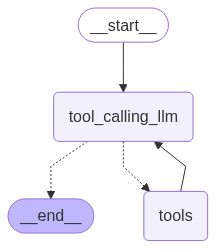

In [ ]:
from langchain_tavily import TavilySearch
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from IPython.display import Image, display



class State(TypedDict):
    messages:Annotated[list,add_messages] ## add_message is acting as reducer

graph_builder=StateGraph(State)
graph_builder

import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

import os
os.environ["GROQ_API_KEY"] = "GROQ_API_KEY"
llm = ChatGroq(model="llama3-8b-8192")
llm

llm = ChatGroq(model="llama3-8b-8192", api_key=os.environ["GROQ_API_KEY"])


tool  = TavilySearch(max_search=2)
tool.invoke("What is langgraph")

import sys
print(sys.executable)

import pkg_resources
installed_packages = {pkg.key for pkg in pkg_resources.working_set}
print('langchain-tavily' in installed_packages)


##Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    args:
         a(int): first int
         b(int): second int
        
    Returns:
        int:output int
    
    """

    return a*b




tools=[tool,multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

### Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node Defination
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## create a graph
builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## add edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest messgaes (result) from assistant is a tool call ->tools_condition routes to tools
    # if the latest messgaes (result) from assistant is a not tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")


##compile the graph
graph1 = builder.compile(checkpointer=memory)
display(Image(graph1.get_graph().draw_mermaid_png()))


In [8]:
config = {"configurable": {"thread_id":"1"}}

In [9]:
respone =graph1.invoke({"messages":"Hi my name is Atul"},config= config)
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

content='Hi my name is Atul' additional_kwargs={} response_metadata={} id='28b11c9a-2aac-41a3-9d2a-b5dfbb87d39f'
content="Hello Atul! It's nice to meet you. How can I assist you today?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 2204, 'total_tokens': 2223, 'completion_time': 0.03416047, 'prompt_time': 0.244471319, 'queue_time': 0.272083874, 'total_time': 0.278631789}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6d1c2b0784', 'finish_reason': 'stop', 'logprobs': None} id='run--c206652b-9a22-4d94-b89d-392eb3e42471-0' usage_metadata={'input_tokens': 2204, 'output_tokens': 19, 'total_tokens': 2223}


In [10]:
respone =graph1.invoke({"messages":"Hey, what is my name ?"},config= config)
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

content='Hi my name is Atul' additional_kwargs={} response_metadata={} id='28b11c9a-2aac-41a3-9d2a-b5dfbb87d39f'
content="Hello Atul! It's nice to meet you. How can I assist you today?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 2204, 'total_tokens': 2223, 'completion_time': 0.03416047, 'prompt_time': 0.244471319, 'queue_time': 0.272083874, 'total_time': 0.278631789}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6d1c2b0784', 'finish_reason': 'stop', 'logprobs': None} id='run--c206652b-9a22-4d94-b89d-392eb3e42471-0' usage_metadata={'input_tokens': 2204, 'output_tokens': 19, 'total_tokens': 2223}
content='Hey, what is my name ?' additional_kwargs={} response_metadata={} id='312bd37a-dd8c-47f6-a512-6e431fc80b3c'
content='Your name is Atul.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 2239, 'total_tokens': 2246, 'completion_time': 0.022285449, 'prompt_time': 0.255574662,